# Màquines de vectors de suport (Support Vector Machines)

Aquest notebook conté diferents exemples per a la unitat sobre màquines de vectors de suport.

## SVM. Exemples amb Iris. SVM Linial.

Aquest apartat conté el processament del corpus per Iris amb Support Vector Machines, per exemplificar els conceptes de la unitat.

In [35]:
# Importem el corpus i les llibreries

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Carreguem el corpus Iris
iris=load_iris(as_frame=True)

# I ens quedem només amb l'alt i ample dels pètals
X=iris.data[["petal length (cm)", "petal width (cm)"]].values

# Classifiquem només les "Iris Setosa"
# Per a això, posem True quan iris.target val 0 (0-Setosa, 1 Versicolor, 2 Virginica
Y=(iris.target == 0)

# Creem una pipeline per realitzar primer un escalat estàndard
# i després aplicar un SVC linial amb l'hiperparàmetre de 
# regularització C=1.
classificador_svm=make_pipeline(StandardScaler(),
                               LinearSVC(C=100, random_state=42))

# Entrenem el model amb les dades
classificador_svm.fit(X, Y)


/home/joamuran/devtools/miniconda3/envs/proves/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=100, random_state=42))])

In [45]:
# Podem fer ús d'aquest classificador per fer noves prediccions

punts_nous=[[2.5, 0.4], [5.0, 1.5]]

classificador_svm.predict(punts_nous)

array([ True, False])

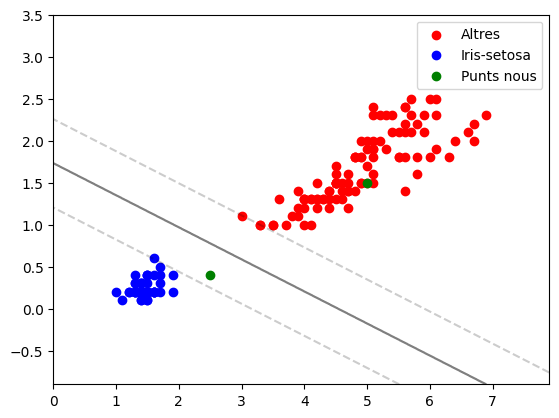

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Creem una graella de punts per a evaluar el model
x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000),
        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# Utilitzem el model per a predir la classe de cada punt de la malla
y_pred = classificador_svm.predict(X_new).reshape(x0.shape)

# Utilitzem el model per a obtenir la distància de cada punt a la frontera de decisió
y_decision = classificador_svm.decision_function(X_new).reshape(x0.shape)

# Representem les dades utilitzant un scatter plot
plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], color="red", label="Altres")
plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], color="blue", label="Iris-setosa")

# Representem la frontera de decisió i els marges
plt.contour(x0, x1, y_pred, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.contour(x0, x1, y_decision, colors='k', levels=[-1, 1], alpha=0.2, linestyles=['--'])


# Pintem els punts
x_coords = [p[0] for p in punts_nous]
y_coords = [p[1] for p in punts_nous]

plt.scatter(x_coords, y_coords, color='green', marker='o', label='Punts nous')



plt.legend()
plt.show()

## SVM No linial

### Exemple previ amb Polynomial Features

El següent codi per il·lustrar les característiques polinomials genera una nova matriu X_poly amb les característiques polinòmiques fins a grau 2. La utilitat d'aquests transformadors és que permet als models considerar relacions no linials entre les característiques originals.

In [8]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Exemple de dades
X = np.array([[0, 1], [2, 3], [4, 5]])

# Crea el transformador PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Transforma les dades
X_poly = poly.fit_transform(X)

print(X_poly)

[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


Veiem com s'obté cada dada.

Per tal d'obtindre la primera fila X[0], partim de les característiques originals [X1=0, X2=1], i obtenim les combinacions polinòmiques fins al quadrat:

* 1, x1=0, x2=1, x1^2=0, x1*x2=0*1, x2^2 = 1 ->  [1, 0, 1, 0, 0, 1]

Per a la segona fila X[1], partim de les característiques originals [ x1 = 2, x2 = 3], i calculem:

* 1, x1 = 2, x2 = 3, x1^2 = 4, x1 * x2 = 2*3 = 6, x2^2 = 9 -> [ 1, 2, 3, 4, 6, 9 ]

êr a la tercera, partim de les característiques [x1 = 4, x2 = 5], i calculem:

* 1, x1 = 4, x2 = 5, x1^2 = 4^2 = 6, x1*x2 = 4*5=20 , x2^2=5^2= 25 -> [1, 4, 5, 16, 20, 25]

### SVM no linial amb Polynomial features

In [9]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

classificador_polinomial_svm=make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)


In [10]:
# Entrena el classificador

classificador_polinomial_svm.fit(X,y)

/home/joamuran/devtools/miniconda3/envs/proves/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

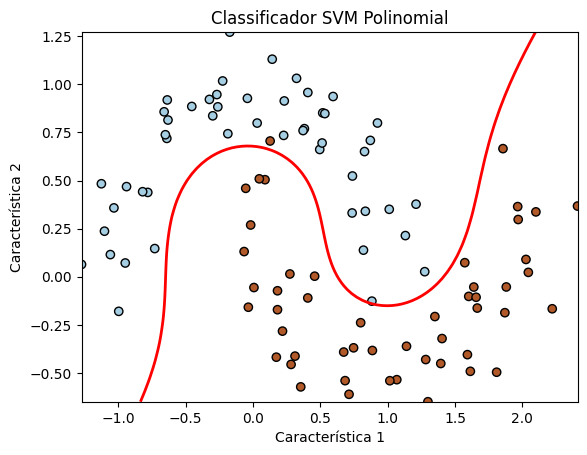

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una malla de punts per representar el gràfic
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = classificador_polinomial_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibuixa les mitges llunes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Dibuixa l'hiperpla de decisió
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# Etiquetes dels eixos
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Títol del gràfic
plt.title('Classificador SVM Polinomial')

# Mostra el gràfic
plt.show()

In [13]:
# Comprovem un parell de punts

punts_nous=[[0, 0], [ 1, 0.25]]

classificador_polinomial_svm.predict(punts_nous)

array([1, 0])

### SVM no linials amb Kernels polinomials

In [18]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline


classificador_kernel_polinomial=make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=1, C=5)
)

In [19]:
classificador_kernel_polinomial.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

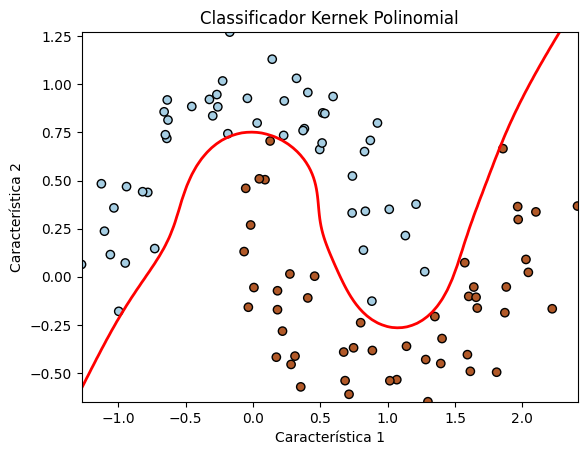

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una malla de punts per representar el gràfic
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = classificador_kernel_polinomial.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibuixa les mitges llunes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Dibuixa l'hiperpla de decisió
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# Etiquetes dels eixos
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Títol del gràfic
plt.title('Classificador Kernek Polinomial')

# Mostra el gràfic
plt.show()

### Característiques de similitud

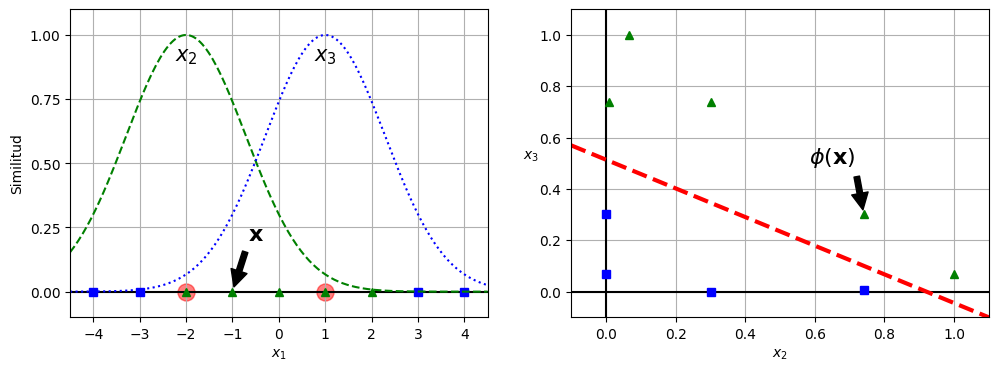

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Aquest codi ens serveix per dibuixar el gràfic sobre les característiques de similitud

# Funció per calcular la funció de base radial Gaussiana
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

# El paràmetre Gamma defineix com d'ampla serà la campana
gamma = 0.3

# Calculem els punts per dibuixar les campanes
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Eixos
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similitud")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

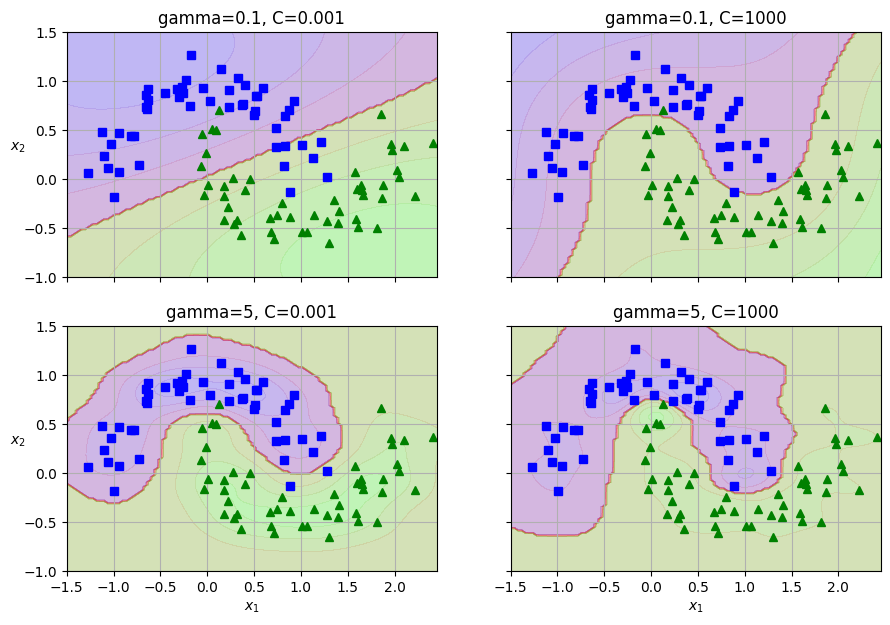

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Funcions auxiliars

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Dibuix dels SVM amb kernerl FBR

# Valors obtinguts amb make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


# Paràmetres
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

In [14]:
# Codi addicional per dibuixar el gràfic sobre regressió SVM linial

from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

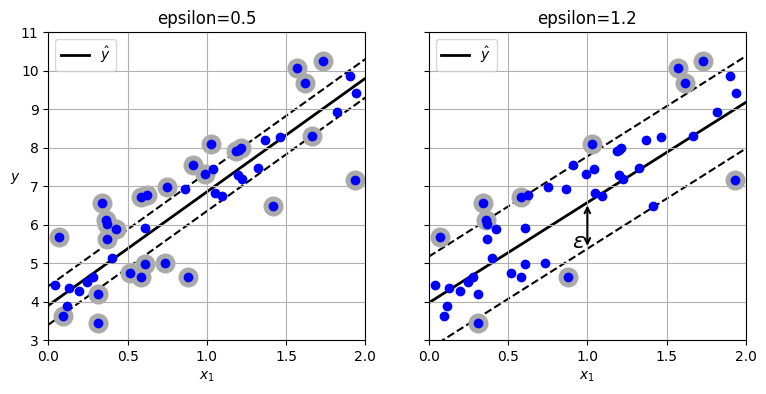

In [16]:
# Codi addicional per dibuixar el gràfic sobre regressió SVM linial

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()

plt.show()


# Exemple amb SVM kernelitzat

In [17]:
from sklearn.svm import SVR

# Codi addicional per fer els gràfics
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

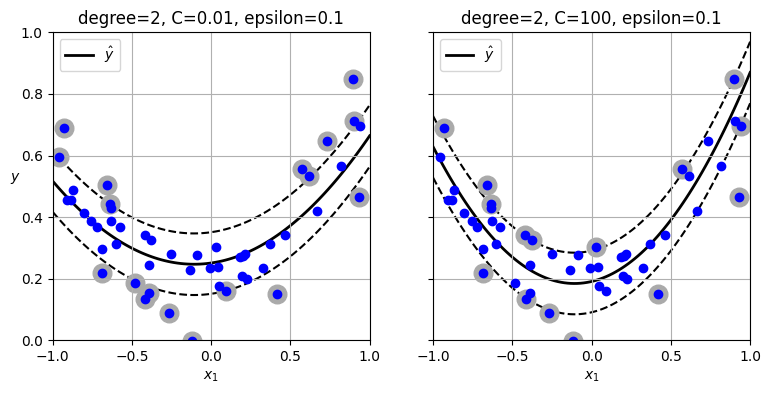

In [18]:
# Codi addicional per fer els gràfics


svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()